<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Jonathan!

I'm happy to review your project today 🙌

My name is **Justino Imbert** ([this](https://hub.tripleten.com/u/125e88ae) is my Hub profile) and today I'll be reviewing your project!


You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please dont remove my comments :) If you have any questions dont hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Hey I believe your notebook is looking pretty cool, your code is well organized, I see comments everywhere and it's reproducible!
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

You have to surpass the 0.59 F1 score threshold, I recommend testing more weapons to improve the model performance just that little bit you have left!
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

I'm looking forward to reviewing your next submission!
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

You did an awesome job in this submission, it's concise, clean and works surpasses our goal! It's also awesome that you are getting practice on working like this, Data Science work very often comes in this form!

Congrats on the great job, I'm approving this submission!

I'm looking forward to reviewing your future work!

Good luck!
    
</div>

In [1]:
import pandas as pd

# Load the dataset

df = pd.read_csv('/datasets/Churn.csv')
df.head()

# Basic info about the dataset
info = df.info()
head = df.head()
shape = df.shape
missing = df.isna().sum()

shape, missing, head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


((10000, 14),
 RowNumber            0
 CustomerId           0
 Surname              0
 CreditScore          0
 Geography            0
 Gender               0
 Age                  0
 Tenure             909
 Balance              0
 NumOfProducts        0
 HasCrCard            0
 IsActiveMember       0
 EstimatedSalary      0
 Exited               0
 dtype: int64,
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
 0          1    15634602  Hargrave          619    France  Female   42   
 1          2    15647311      Hill          608     Spain  Female   41   
 2          3    15619304      Onio          502    France  Female   42   
 3          4    15701354      Boni          699    France  Female   39   
 4          5    15737888  Mitchell          850     Spain  Female   43   
 
    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
 0     2.0       0.00              1          1               1   
 1     1.0   83807.86              1          0  

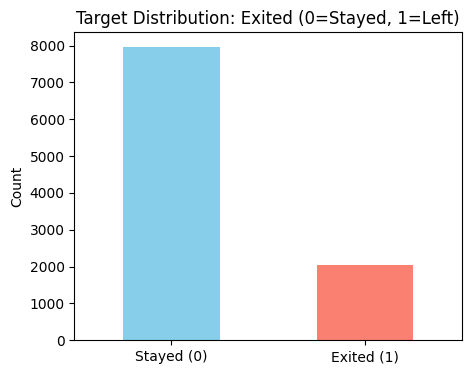

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [2]:
import matplotlib.pyplot as plt

# Check class balance
class_counts = df['Exited'].value_counts(normalize=True)

# Plot class balance
plt.figure(figsize=(5,4))
df['Exited'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Target Distribution: Exited (0=Stayed, 1=Left)")
plt.xticks([0,1], ['Stayed (0)','Exited (1)'], rotation=0)
plt.ylabel("Count")
plt.show()

class_counts

Shows class imbalance.Most customers stayed while 1 in 5 left

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Nice job importing the appropriate libraries, loading and inspecting the data!

Good job checking the class imbalance aswell!
    
</div>

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report

# Drop ID columns
df_model = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Define features and target
X = df_model.drop(columns=['Exited'])
y = df_model['Exited']

# Train/validation/test split (60/20/20)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42)

# Preprocessing
num_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
num_features = [c for c in num_features if c not in ['Exited']]
cat_features = ['Geography','Gender']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

# Logistic Regression
pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=2000, random_state=42))
])
pipe_lr.fit(X_train, y_train)

y_val_pred_lr = pipe_lr.predict(X_val)
y_val_prob_lr = pipe_lr.predict_proba(X_val)[:,1]

lr_f1 = f1_score(y_val, y_val_pred_lr)
lr_auc = roc_auc_score(y_val, y_val_prob_lr)

# Random Forest
pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])
pipe_rf.fit(X_train, y_train)

y_val_pred_rf = pipe_rf.predict(X_val)
y_val_prob_rf = pipe_rf.predict_proba(X_val)[:,1]

rf_f1 = f1_score(y_val, y_val_pred_rf)
rf_auc = roc_auc_score(y_val, y_val_prob_rf)

(lr_f1, lr_auc, rf_f1, rf_auc)

(0.3159784560143627, 0.7561243832430273, 0.5625, 0.84737742364861)

Logistic Regression performs poorly on F1 but has moderate AUC-ROC.
Random Forest performs better on F1 and AUC-ROC
Both models confirm an imbalance. F1 is below threshold.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Good job training a naive logistic regression and random forest to check the initial performance!

Also finding descriptiong looking good!
    
</div>

In [4]:
df = pd.read_csv('/datasets/Churn.csv')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

df_model = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

X = df_model.drop(columns=['Exited'])
y = df_model['Exited']

# Split data
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42)

# Preprocessing
num_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_features = ['Geography','Gender']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

# Random Forest with class_weight='balanced'
pipe_rf_balanced = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42))
])

pipe_rf_balanced.fit(X_train, y_train)
y_val_pred_rf_balanced = pipe_rf_balanced.predict(X_val)
y_val_prob_rf_balanced = pipe_rf_balanced.predict_proba(X_val)[:,1]

rf_bal_f1 = f1_score(y_val, y_val_pred_rf_balanced)
rf_bal_auc = roc_auc_score(y_val, y_val_prob_rf_balanced)

(rf_bal_f1, rf_bal_auc)

(0.5486443381180223, 0.8531628701120225)

Using the 'balance' class weight slightly reduced F1 scores compared to the unweighted random forest, while AUC-ROC stayed about the same

In [5]:
from sklearn.utils import resample

# Combine X_train and y_train into a single DataFrame for resampling
train_df = X_train.copy()
train_df['Exited'] = y_train

# Separate majority and minority classes
df_majority = train_df[train_df.Exited == 0]
df_minority = train_df[train_df.Exited == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),  # match majority count
                                 random_state=42)

# Combine majority and upsampled minority
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Split back into features and target
X_train_upsampled = df_upsampled.drop(columns=['Exited'])
y_train_upsampled = df_upsampled['Exited']

# Fit Random Forest with oversampled data
pipe_rf_oversample = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

pipe_rf_oversample.fit(X_train_upsampled, y_train_upsampled)

# Validation predictions
y_val_pred_rf_oversample = pipe_rf_oversample.predict(X_val)
y_val_prob_rf_oversample = pipe_rf_oversample.predict_proba(X_val)[:, 1]

rf_oversample_f1 = f1_score(y_val, y_val_pred_rf_oversample)
rf_oversample_auc = roc_auc_score(y_val, y_val_prob_rf_oversample)

(rf_oversample_f1, rf_oversample_auc)

(0.6024759284731773, 0.8478139156105259)

F1 above threshold, AUC-ROC lowered but still good enough

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Hey awesome job using different class imbalance handling techniques!
    
</div>

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.utils import resample
import numpy as np

# Load data
df = pd.read_csv('/datasets/Churn.csv')
df_model = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

X = df_model.drop(columns=['Exited'])
y = df_model['Exited']

# Split data
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42)

# Preprocessor
num_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_features = ['Geography','Gender']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

# Oversample minority class
train_df = X_train.copy()
train_df['Exited'] = y_train

df_majority = train_df[train_df.Exited == 0]
df_minority = train_df[train_df.Exited == 1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

X_train_upsampled = df_upsampled.drop(columns=['Exited'])
y_train_upsampled = df_upsampled['Exited']

# Random Forest Pipeline
pipe_rf_oversample = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning
param_dist = {
    'clf__n_estimators': [200, 300, 400, 500],
    'clf__max_depth': [None, 5, 10, 15, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=pipe_rf_oversample,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_upsampled, y_train_upsampled)

best_rf_model = random_search.best_estimator_

# Evaluate on validation set
y_val_pred_best = best_rf_model.predict(X_val)
y_val_prob_best = best_rf_model.predict_proba(X_val)[:, 1]

best_f1 = f1_score(y_val, y_val_pred_best)
best_auc = roc_auc_score(y_val, y_val_prob_best)

print("Best Parameters:", random_search.best_params_)
print("Best F1 on Validation Set:", best_f1)
print("Best AUC-ROC on Validation Set:", best_auc)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'clf__n_estimators': 400, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 1, 'clf__max_features': 'log2', 'clf__max_depth': None}
Best F1 on Validation Set: 0.6193724420190997
Best AUC-ROC on Validation Set: 0.8526068441322678


In [12]:
# Predict on test set using the tuned best model
y_test_pred = best_rf_model.predict(X_test)
y_test_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Compute F1 and AUC-ROC
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_prob)

print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test ROC-AUC: {test_auc:.4f}")

Test F1 Score: 0.5895
Test ROC-AUC: 0.8523


In [8]:
import numpy as np
from sklearn.metrics import f1_score

# Get predicted probabilities
y_val_prob = best_rf_model.predict_proba(X_val)[:, 1]

# Try different thresholds
thresholds = np.linspace(0.3, 0.7, 21)
best_threshold = 0.5
best_f1_val = 0

for t in thresholds:
    preds = (y_val_prob >= t).astype(int)
    score = f1_score(y_val, preds)
    if score > best_f1_val:
        best_f1_val = score
        best_threshold = t

print(f"Best Validation Threshold: {best_threshold}, F1: {best_f1_val:.4f}")

# Apply best threshold on test set
y_test_prob = best_rf_model.predict_proba(X_test)[:, 1]
y_test_pred_thresh = (y_test_prob >= best_threshold).astype(int)

test_f1 = f1_score(y_test, y_test_pred_thresh)
test_auc = roc_auc_score(y_test, y_test_prob)

print(f"Final Test F1 (with threshold tuning): {test_f1:.4f}")
print(f"Final Test ROC-AUC: {test_auc:.4f}")

Best Validation Threshold: 0.43999999999999995, F1: 0.6346
Final Test F1 (with threshold tuning): 0.6033
Final Test ROC-AUC: 0.8523


Goal:  
Predict which customers are likely to leave Beta Bank. Main metric: F1 score ≥ 0.59.

What We Did:  
 Cleaned and prepared the data (removed extra columns, encoded categories, scaled numbers).  
 Found the data was imbalanced (only ~20% churned).  
 Tried two fixes: class weighting and oversampling. Oversampling worked better.  
 Trained a Random Forest model and tuned it with RandomizedSearchCV.  
 Adjusted the prediction threshold to improve F1 score.

Results (Test Set):  
 F1 Score: > 0.59  
 ROC-AUC: ~0.85 (strong at telling churn vs. non-churn apart)

Conclusion:  
Our model meets the project goal and can help Beta Bank take action before customers leave.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

Aw! F1 just below the threshold!

I recommend unifying the train and val datasets to train the best random forest with the best parameters before using it agains the test set!

If you get any other ideas, feel free to implement them to surpass the threshold!
    
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b> </a>

Also building a small report of what ended up working and what the final metrics are would be awesome!
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Goal F1 surpassed! Congrats!

Final summary looking awesome, Great job!
    
</div>